# Utilização do Seaborn para Analise de dados

## Plots de Distribuição

In [1]:
import numpy as np
import seaborn as sns

# vou usar o matplotlib com plot direto
%matplotlib inline

In [2]:
# dados para o plot
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Dados de gorjetas para exemplificar

Displot - Histograma dos dados.

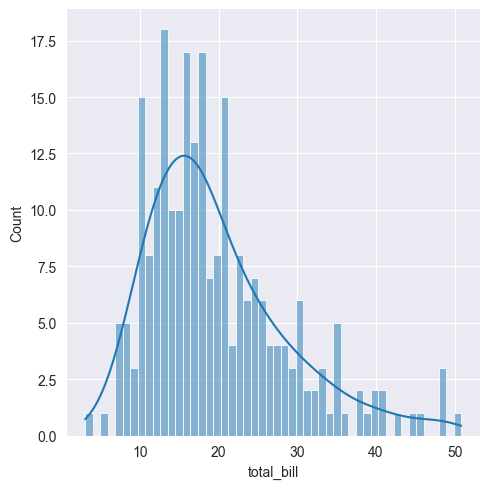

In [3]:
sns.displot(
    x='total_bill', # coluna a ser analisada
    data=tips, # Pandas DF de origem da coluna
    bins=50, # Densidade da coluna do histograma
    kde=True, # Mostrar ou ocultar a linha do KDE

)

Joinplot - Comparar duas variáveis de um mesmo df

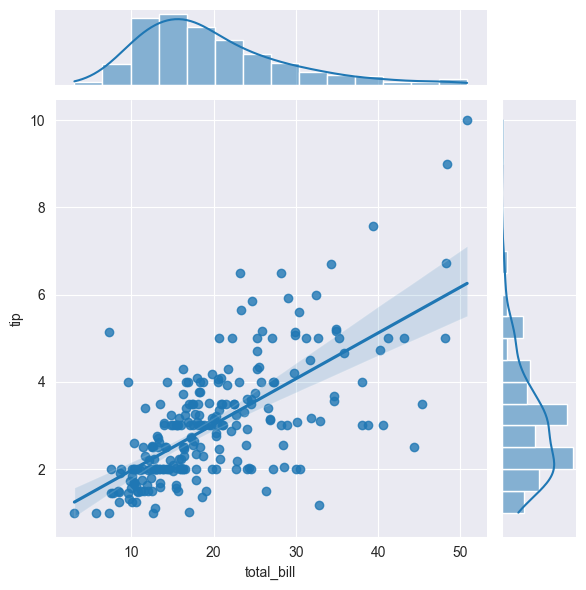

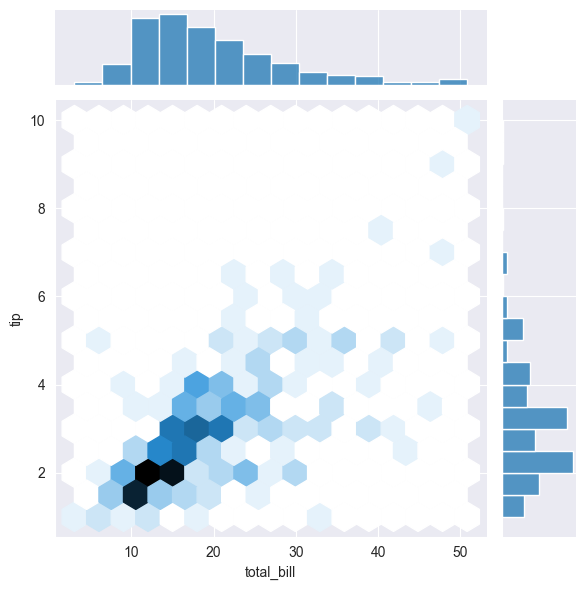

In [4]:
sns.jointplot(
    x='total_bill', # Variável A da comparação
    y='tip', # Variável B da comparação
    data=tips, # Pandas DF das colunas
    kind='reg', # todo verificar o parametro kind
)
sns.jointplot(
    x='total_bill', # Variável A da comparação
    y='tip', # Variável B da comparação
    data=tips, # Pandas DF das colunas
    kind='hex', # todo verificar o parametro kind
)

Pairplot - Realiza uma analise geral das variáveis quantitativas do DF

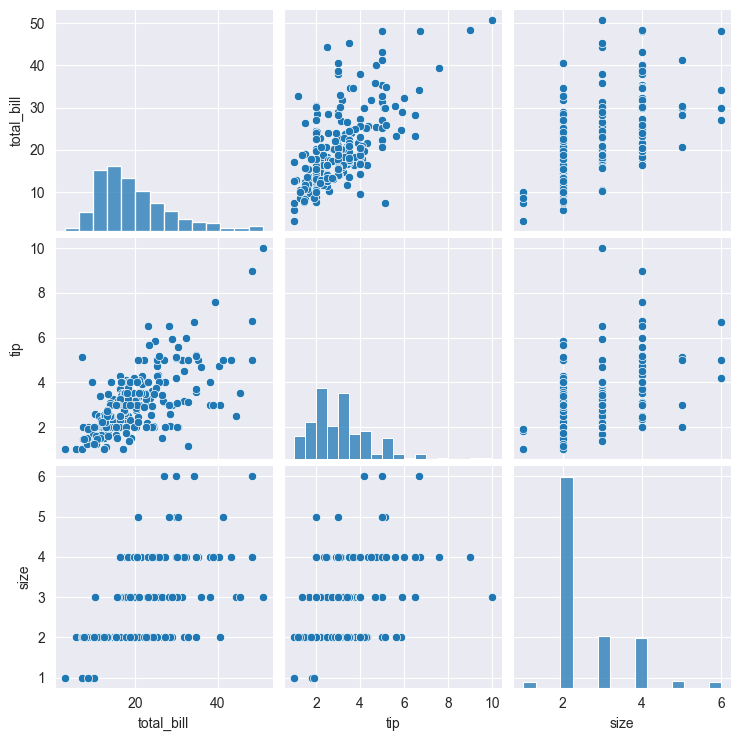

In [5]:
sns.pairplot(
    data=tips # DF a ser analisado
    # meu HUE não ta funcionando aqui....
)

Rugplot - demonstra de forma breve a distribuição dos dados.

<AxesSubplot: xlabel='tip'>

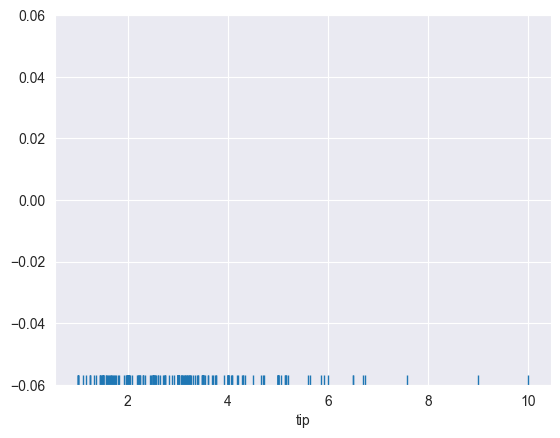

In [6]:
sns.rugplot(x='tip', data=tips)
# como deixar esse grafico mais "baixo"?

##  plots bons para dados Categóricos

barplots - boa demonstração para comparação entre os valores de uma variável categórica, sobre uma variável quantitativa.

<AxesSubplot: xlabel='sex', ylabel='total_bill'>

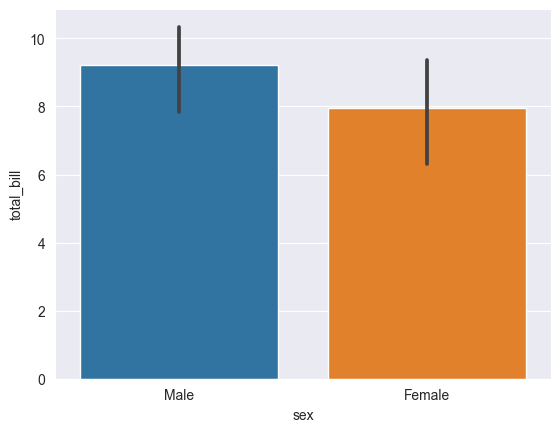

In [7]:
sns.barplot(
    x='sex', # coluna de classificação
    y='total_bill', # coluna de valores
    data=tips, # df base
    estimator=np.std # formula para avaliação... REVER
)

countplot - contagem basica (barplot sem a barra de variação)

<AxesSubplot: xlabel='sex', ylabel='count'>

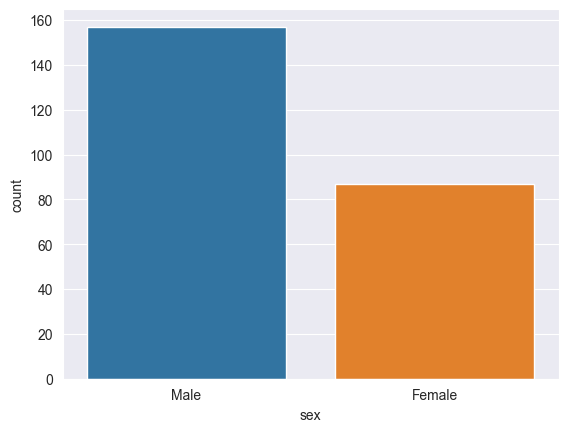

In [8]:
sns.countplot(x='sex',  data=tips)

boxplot - Avalia os quartis de uma variável e separa os outliers.

<AxesSubplot: xlabel='day', ylabel='total_bill'>

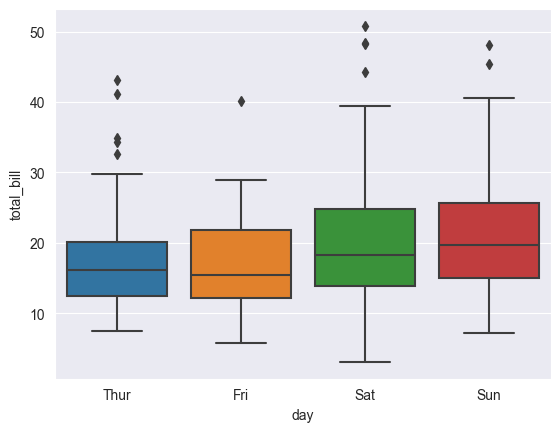

In [9]:
sns.boxplot(x='day', y='total_bill', data=tips)

<AxesSubplot: xlabel='day', ylabel='total_bill'>

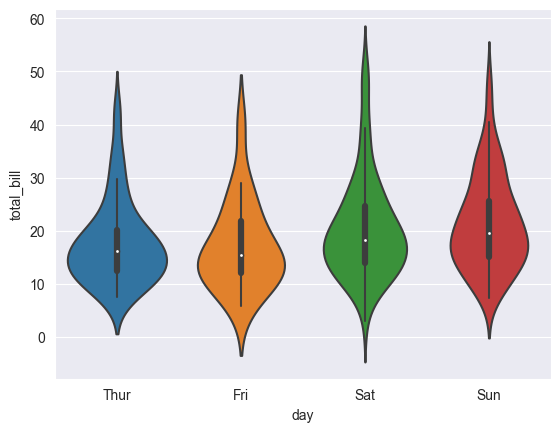

In [10]:
sns.violinplot(data=tips, x='day', y='total_bill')

Plots Matriciais

In [57]:
tips_pivot = tips.pivot_table(values='total_bill', columns='sex time'.split(), index='day').fillna(0)

In [48]:
tips_pivot1 = tips.pivot_table(columns='day', index='total_bill').fillna(0)
tips_pivot1


C:\Users\root\AppData\Local\Temp\ipykernel_16192\3195768546.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  tips_pivot1 = tips.pivot_table(columns='day', index='total_bill').fillna(0)


size                  tip                  
day        Thur  Fri  Sat  Sun  Thur  Fri    Sat   Sun
total_bill                                            
3.07        0.0  0.0  1.0  0.0  0.00  0.0   1.00  0.00
5.75        0.0  2.0  0.0  0.0  0.00  1.0   0.00  0.00
7.25        0.0  0.0  1.0  2.0  0.00  0.0   1.00  5.15
7.51        2.0  0.0  0.0  0.0  2.00  0.0   0.00  0.00
7.56        2.0  0.0  0.0  0.0  1.44  0.0   0.00  0.00
...         ...  ...  ...  ...   ...  ...    ...   ...
45.35       0.0  0.0  0.0  3.0  0.00  0.0   0.00  3.50
48.17       0.0  0.0  0.0  6.0  0.00  0.0   0.00  5.00
48.27       0.0  0.0  4.0  0.0  0.00  0.0   6.73  0.00
48.33       0.0  0.0  4.0  0.0  0.00  0.0   9.00  0.00
50.81       0.0  0.0  3.0  0.0  0.00  0.0  10.00  0.00

[229 rows x 8 columns]

<AxesSubplot: xlabel='None-day', ylabel='total_bill'>

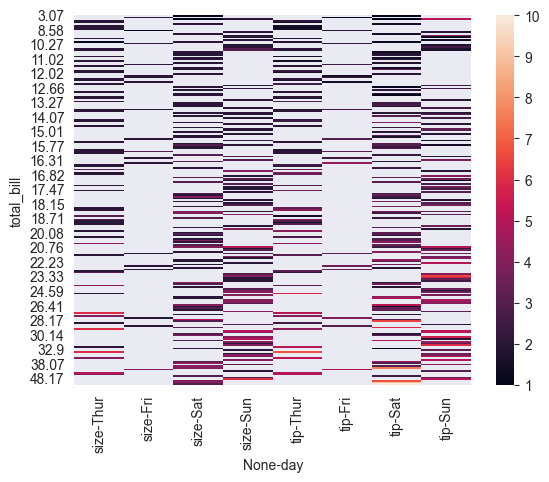

In [59]:
dfheat = tips_pivot1[tips_pivot1['tip'] > 0]
sns.heatmap(dfheat)

day,Thur,Fri,Sat,Sun
total_bill,,,,
3.07,False,False,True,False
5.75,False,True,False,False
7.25,False,False,True,True
7.51,True,False,False,False
7.56,True,False,False,False
...,...,...,...,...
45.35,False,False,False,True
48.17,False,False,False,True
48.27,False,False,True,False
